In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [3]:
df = pd.read_csv("all_stocks_5yr.csv")

In [4]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [5]:
AAPL = df.drop(df[df.Name != 'AAPL'].index)
NVDA = df.drop(df[df.Name != 'NVDA'].index)
AAPL_close = AAPL[['close', 'date']].copy()
NVDA_close = NVDA[['close', 'date']].copy()

<AxesSubplot:xlabel='date', ylabel='close'>

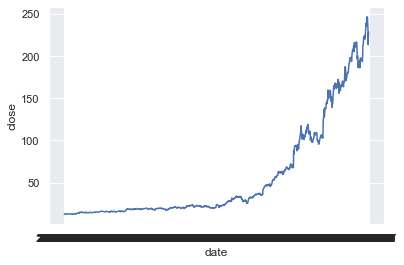

In [6]:
sb.lineplot(data = NVDA_close, x = 'date', y = 'close')

In [7]:
NVDA_open_close = NVDA[['close', 'open']].copy()

<AxesSubplot:xlabel='open', ylabel='close'>

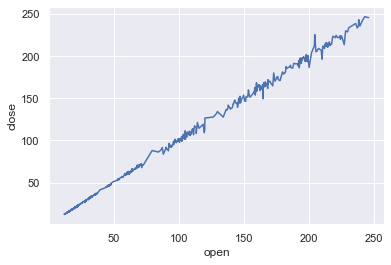

In [8]:
sb.lineplot(data = NVDA_open_close, x = 'open', y = 'close')

<AxesSubplot:xlabel='close', ylabel='Count'>

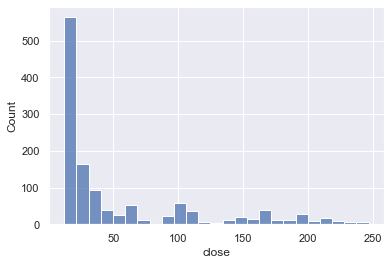

In [9]:
sb.histplot(data = NVDA['close'])

In [10]:
NVDA.skew()

open      1.505020
high      1.503523
low       1.508566
close     1.505411
volume    3.345787
dtype: float64

In [12]:
df = pd.read_csv("stocks_with_RSI_EMA.csv")
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

NVDA = df.drop(df[df.Name != 'NVDA'].index)
AAPL = df.drop(df[df.Name != 'AAPL'].index)

dev_ema = [0] * 1259
high_or_low = [0] * 1259
movement = [0] * 1259
movement_sign = [0] * 1259
rsi_sign = [0] * 1259

for i in range(1259):
    dev_ema[i] = NVDA.iloc[i, 13] - NVDA.iloc[i, 4]
    
    if dev_ema[i] > 0:
        high_or_low[i] = 1
    if dev_ema[i] < 0:
        high_or_low[i] = -1
    
    if (NVDA.iloc[i, 7] != 0) and (NVDA.iloc[i, 8] == 0):
        movement[i] = NVDA.iloc[i, 7]
        movement_sign[i] = 1
    if (NVDA.iloc[i, 8] != 0) and (NVDA.iloc[i, 7] == 0):
        movement[i] = -1 * NVDA.iloc[i, 8]
        movement_sign[i] = -1
    if (NVDA.iloc[i, 13] >= 70):
        rsi_sign[i] = 1
    if (NVDA.iloc[i, 13] <= 30):
        rsi_sign[i] = -1

NVDA['High or Low'] = high_or_low
NVDA['DEV from EMA'] = dev_ema
NVDA['Movement'] = movement
NVDA['Movement sign'] = movement_sign
NVDA['RSI sign'] = rsi_sign

dev_ema = [0] * 1259
high_or_low = [0] * 1259
movement = [0] * 1259
movement_sign = [0] * 1259
rsi_sign = [0] * 1259

for i in range(1259):
    dev_ema[i] = AAPL.iloc[i, 13] - AAPL.iloc[i, 4]
    
    if dev_ema[i] > 0:
        high_or_low[i] = 1
    if dev_ema[i] < 0:
        high_or_low[i] = -1
    
    if (AAPL.iloc[i, 7] != 0) and (AAPL.iloc[i, 8] == 0):
        movement[i] = AAPL.iloc[i, 7]
        movement_sign[i] = 1
    if (AAPL.iloc[i, 8] != 0) and (AAPL.iloc[i, 7] == 0):
        movement[i] = -1 * AAPL.iloc[i, 8]
        movement_sign[i] = -1
        
    if (AAPL.iloc[i, 13] >= 70):
        rsi_sign[i] = 1
    if (AAPL.iloc[i, 13] <= 30):
        rsi_sign[i] = -1

AAPL['DEV from EMA'] = dev_ema
AAPL['High or Low'] = high_or_low
AAPL['Movement'] = movement
AAPL['Movement sign'] = movement_sign
AAPL['RSI sign'] = rsi_sign

<AxesSubplot:xlabel='Movement', ylabel='Count'>

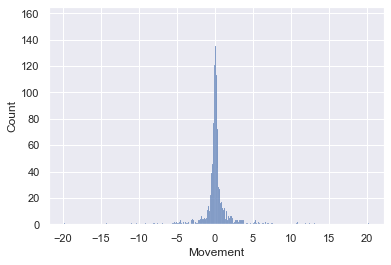

In [16]:
NVDA_mov = NVDA[['Movement', 'date']].copy()
sb.histplot(data = NVDA['Movement'])

<AxesSubplot:xlabel='date', ylabel='Movement'>

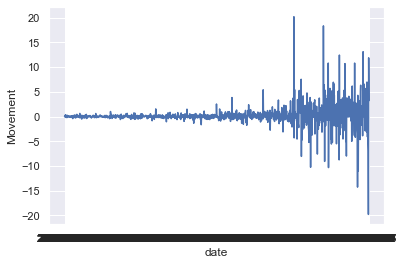

In [14]:
sb.lineplot(data = NVDA_mov, x = 'date', y = 'Movement')